# House price prediction 
In this project we will predict the price of a house giving some characteristics. and we will perform a preprocessing, exploratory data analysis, model development and evaluation 

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score



# Importing Data Set

loading a csv of houses data

In [9]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [10]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df.shape

(21613, 22)

We have 11 characteristics on this dataset

let's get some more information about this data

We are going to display the data types of each column

In [13]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Now let's obtain a statistical summary of the dataframe

In [14]:
df.shape

(21613, 22)

In [15]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling

Drop the columns <code>"id"</code> because it won't help us in our analysis and <code>"Unnamed: 0"</code> because it has no meaning !


In [16]:
df.drop(["Unnamed: 0","id"],axis=1,inplace=True)
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [17]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


We will replace the missing values of the columns <code>'bedrooms'</code> and  <code>'bathrooms'</code> with the mean of each column  

In [18]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [19]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [20]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Now we have no null values

# Exploratory Data Analysis

Lets see the unique values of some features 

In [21]:
floors_values=df["floors"].value_counts().to_frame()
floors_values

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [22]:
condition=df["condition"].value_counts().to_frame()
condition

,condition
3,14031
4,5679
5,1701
2,172
1,30


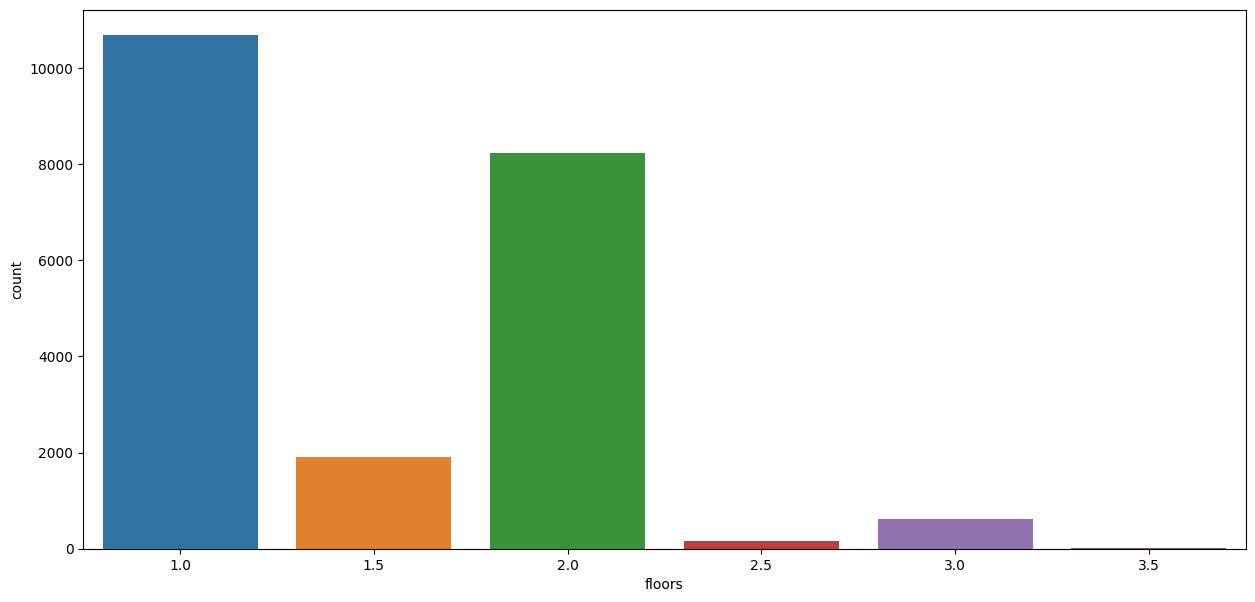

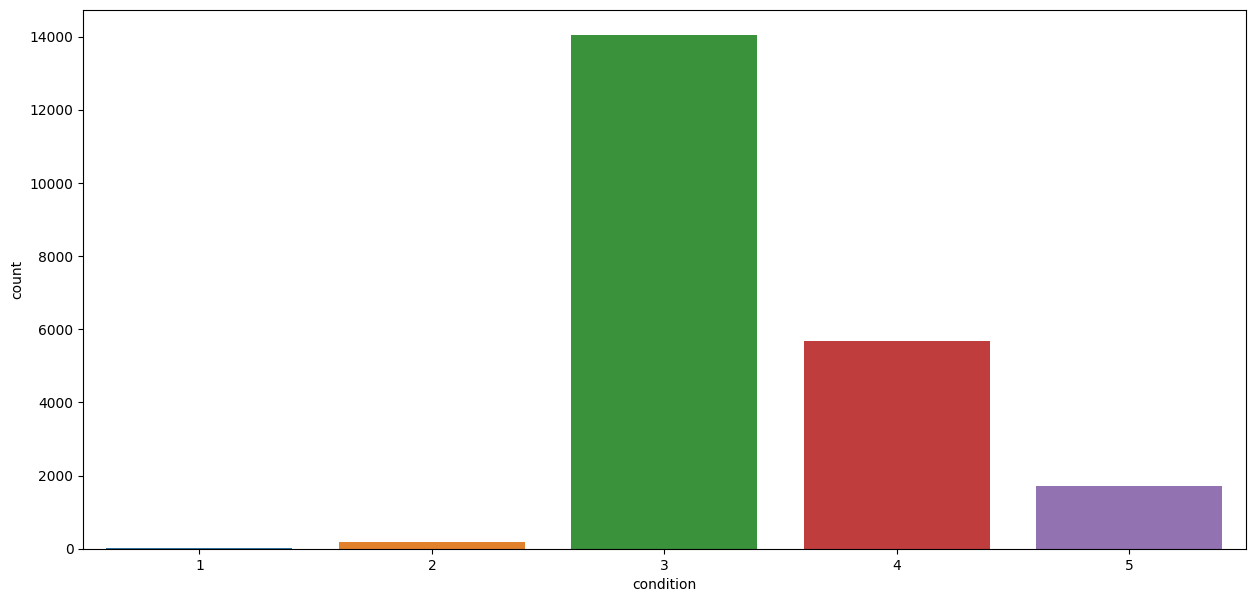

In [23]:
for variable in ['floors','condition']:
       plt.figure(figsize=(15,7))
       sns.countplot(x=variable,data = df)

Now we will determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<AxesSubplot: xlabel='waterfront', ylabel='price'>

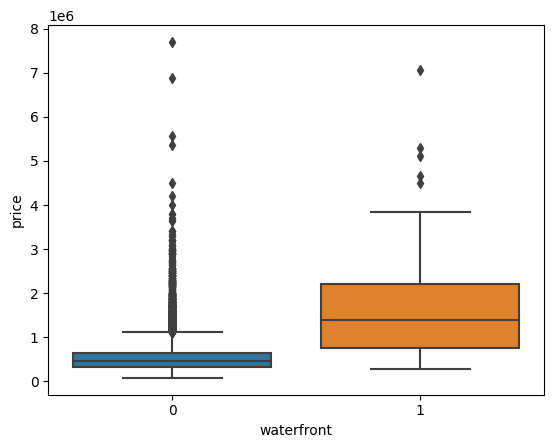

In [24]:
sns.boxplot(x="waterfront",y="price",data=df)

we are going to determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


<AxesSubplot: xlabel='sqft_above', ylabel='price'>

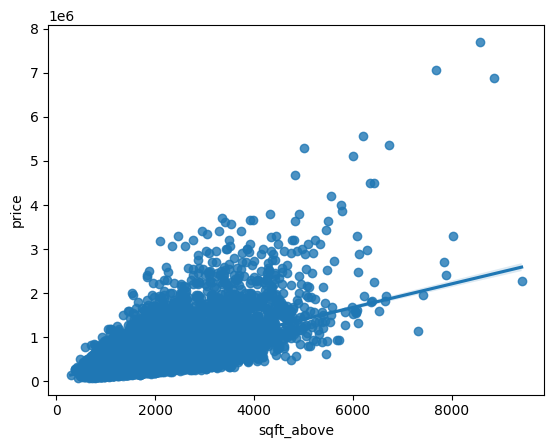

In [25]:
sns.regplot(x="sqft_above",y='price',data=df)

<code>sqft_above</code> is positively correlated with price

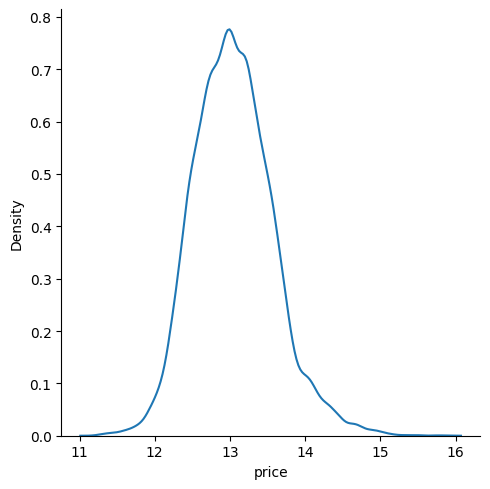

In [26]:
sns.displot(np.log1p(df['price']),kind='kde')

This is distribution plot with a kernel density estimate (KDE) for the natural logarithm of the 'price' column, wich helps visualize the distribution more effectively, reducing the impact of extreme values

# Model development and evaluation

Now that we have prepared our data and gained a better understanding of the dataset, it's time to dive into machine learning modeling. Our goal is to identify the most suitable algorithm

In [27]:
df=df.drop("date",axis=1)


<AxesSubplot: >

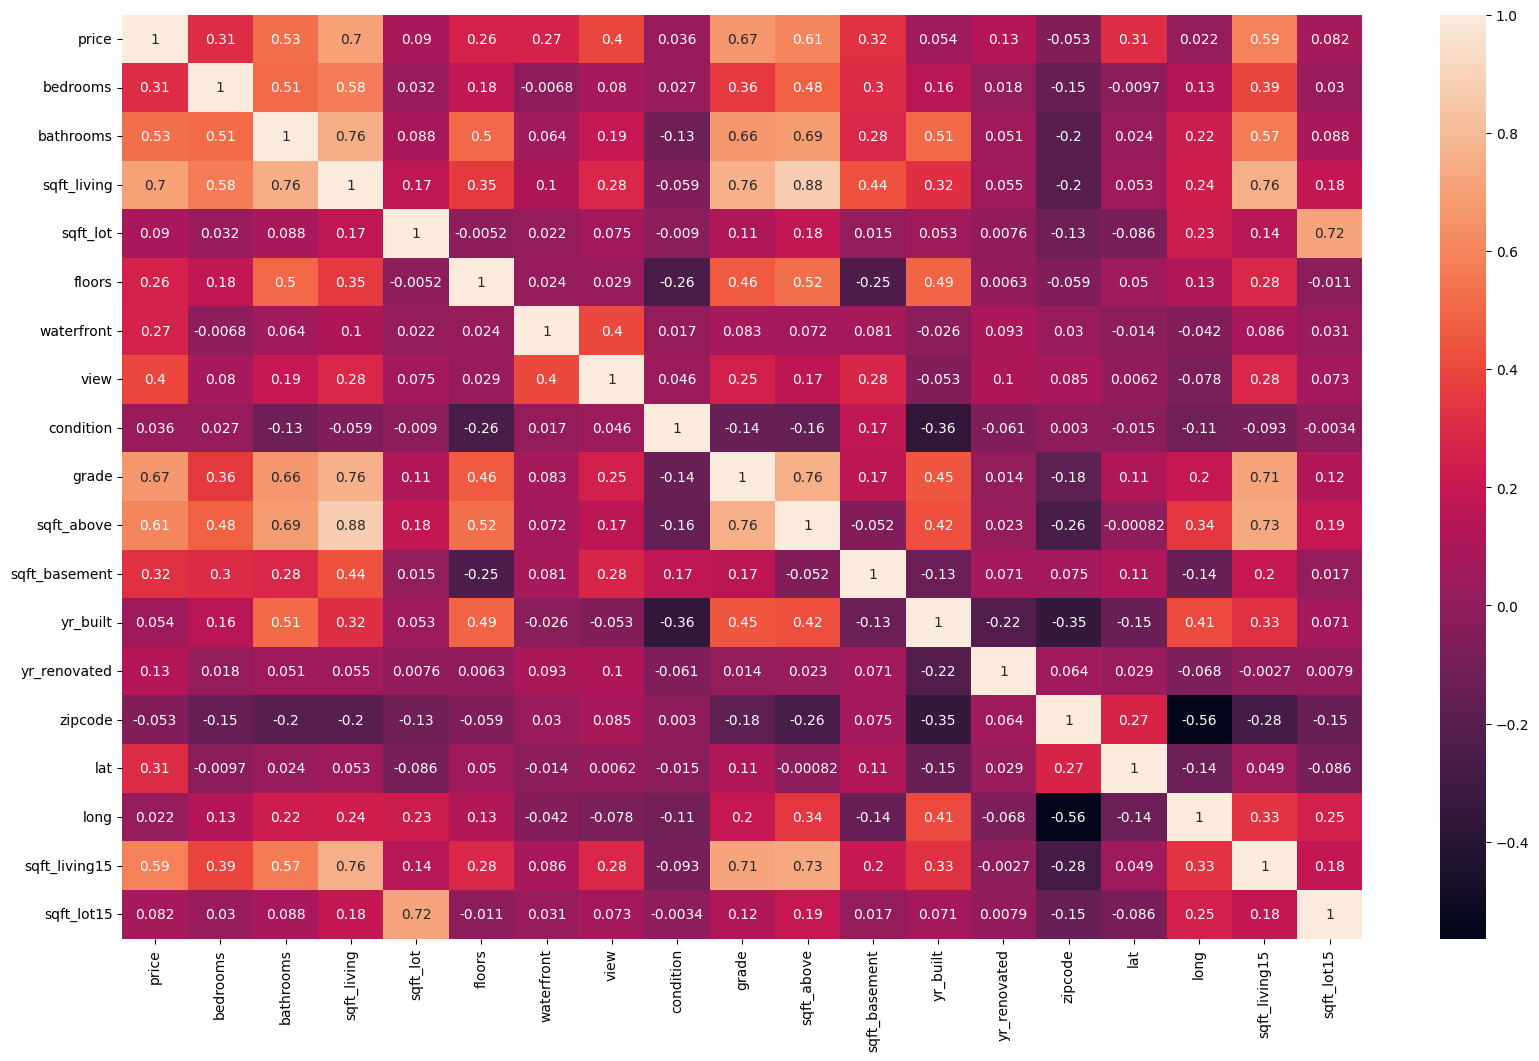

In [28]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [29]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Let's train a linear regression model to make predictions for the 'price' using the selected features that we chose based on the correlation analysis.

In [30]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
features  

['floors',
 'waterfront',
 'lat',
 'bedrooms',
 'sqft_basement',
 'view',
 'bathrooms',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living']

In [31]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371



Let's create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [32]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
ypred=y_predict=ridge.predict(x_test)
print('R2 Score:', r2_score(y_test,ypred)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test,ypred))



R2 Score: 64.78759163939111
Mean Absolute Error: 135855.82652875513


In [33]:
from sklearn.metrics import mean_absolute_error,r2_score

Let's now create a pipeline and calculate the R^2 again.


In [34]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


In [35]:
pipe= Pipeline(Input)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score:', r2_score(y_test,y_pred)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))


R2 Score: 70.9351502837961
Mean Absolute Error: 119827.37075879087


And other models 

In [36]:
Input2=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',DecisionTreeRegressor())]
md=Pipeline(Input2)
md.fit(x_train,y_train)
ypredc=md.predict(x_test)
print('R2 Score:', r2_score(y_test,ypredc)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test,ypredc))

R2 Score: 61.48382717640561
Mean Absolute Error: 122906.98781616286


In [37]:
Input2=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',XGBRegressor())]
md=Pipeline(Input2)
md.fit(x_train,y_train)
ypredd=md.predict(x_test)
print('R2 Score:', r2_score(y_test,ypredd)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test,ypredd))

R2 Score: 79.66744626409671
Mean Absolute Error: 90696.36002564004


So our most performant model is XGBRegressor because it has the highest R2 score ( A higher R2 score indicates a better fit to the data) and the lowest Mean Absolute Error (A smaller MAE indicates that the model's predictions are, on average, closer to the true values in the dataset.)